# Start of project :
## “De gezondheidszorg”

1 Get the data and import the necessary librairies.


In [45]:
# ... import the relevant librairies

import numpy as np
import requests
import pandas as pd
import seaborn as sns # Samuel Norman "Sam" Seaborn is a fictional character portrayed by Rob Lowe on the television serial drama The West Wing. Hence: sns
import matplotlib.pyplot as plt

In [46]:
# ... go to terminal :  ../rest_server/ 
# ... run ./start_rest_server.sh



In [47]:
# ... download from the API with request.get

response = requests.get('http://localhost:8080/medish_centrum_randstad/api/netlify?page=1') 

# ... change the response into dictionairy structured as a .json this does also check if the structure is suitable for a .json

raw_data = response.json()



# ... create a pandas dataframe named df

df_rest = pd.DataFrame.from_dict(raw_data['data']) 
# print(type(download))
# print(type(raw_data))
# display(raw_data)
# display(df)

In [48]:
df_csv = pd.read_csv('../raw_downloads/data.csv')
df_csv.head()

,genetic,length,mass,exercise,smoking,alcohol,sugar,lifespan
0,73.9,185,99.7,0.9,0.0,2.4,6.9,73.1
1,86.0,172,105.4,1.8,8.1,0.4,4.2,85.0
2,83.3,176,111.4,1.1,0.8,4.6,7.5,81.6
3,82.8,164,111.4,4.7,11.8,1.0,2.9,81.0
4,78.7,178,71.6,1.5,8.3,4.9,5.5,75.0


In [49]:
# ... join dataframes

df=pd.concat([df_rest,df_csv]) 

In [50]:
# check what type of data is in the df



df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12288 entries, 0 to 4095
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   genetic   12287 non-null  object 
 1   length    12286 non-null  object 
 2   mass      12287 non-null  object 
 3   exercise  12287 non-null  object 
 4   smoking   12287 non-null  float64
 5   alcohol   12287 non-null  object 
 6   sugar     12288 non-null  object 
 7   lifespan  12288 non-null  float64
dtypes: float64(2), object(6)
memory usage: 864.0+ KB


In [51]:
# ... show the head of the df

df.head()

,genetic,length,mass,exercise,smoking,alcohol,sugar,lifespan
0,84.0,180.0,90.0,2.0,9.0,1.0,2,86.0
1,84.0,204.0,79.0,3.0,2.0,7.0,3,100.0
2,84.0,174.0,74.0,3.0,20.0,3.0,2,87.0
3,84.0,187.0,78.0,2.0,6.0,5.0,3,91.0
4,84.0,187.0,89.0,2.0,12.0,0.0,2,83.0


*Run this to save the dataframe as .csv*





2 Some data checks to see what type of data the we have put into the df

In [52]:
# ...some statistical data of the df. only columns that have as type int or float will be printed below. 


df.describe()

   

,smoking,lifespan
count,12287.000000,12288.000000
mean,9.785000,77.439974
std,6.951698,10.229174
min,0.000000,-1.000000
25%,3.000000,71.000000
50%,9.700000,77.400000
75%,16.000000,84.000000
max,22.200000,113.000000


In [53]:
# ... check the number of duplicated rows:
# ... The excpected result is (0, 8) zero duplicated rows of 8 columns. 
# ... check if this is the case:

duplicate_rows_df = df[df.duplicated()]
print ("Number of duplicate rows: ", duplicate_rows_df.shape)

if duplicate_rows_df.shape == (0, 8):
    print ('There are no unexcpected duplicates')
else:
    print ('There are unexcpected duplicates please look at the data')


Number of duplicate rows:  (0, 8)
There are no unexcpected duplicates


In [54]:
# ...a posibility to remove duplicate rows from the dataset 
# ... this might be an option to use if there are duplicates that need not be in the dataset. it probably is not needed.   

# df_remove_duplicate = df = df.drop_duplicates()
# df_remove_duplicate.head()

# df.info()
# print()
# df_remove_duplicate.info()

In [55]:
# any missing values? 

print(df.isnull().sum())

genetic     1
length      2
mass        1
exercise    1
smoking     1
alcohol     1
sugar       0
lifespan    0
dtype: int64


In [56]:
# ... a script to convert all non numbers to NaN
# ... then a script to set the data type to float

df['genetic'] = pd.to_numeric(df['genetic'], errors='coerce')
df['length'] = pd.to_numeric(df['length'], errors='coerce')
df['mass'] = pd.to_numeric(df['mass'], errors='coerce')
df['exercise'] = pd.to_numeric(df['exercise'], errors='coerce')
df['alcohol'] = pd.to_numeric(df['alcohol'], errors='coerce')
df['sugar'] = pd.to_numeric(df['sugar'], errors='coerce')


df.astype('float64').dtypes


print(df.isnull().sum())
print(df.info())

genetic     2
length      5
mass        3
exercise    2
smoking     1
alcohol     3
sugar       1
lifespan    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 12288 entries, 0 to 4095
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   genetic   12286 non-null  float64
 1   length    12283 non-null  float64
 2   mass      12285 non-null  float64
 3   exercise  12286 non-null  float64
 4   smoking   12287 non-null  float64
 5   alcohol   12285 non-null  float64
 6   sugar     12287 non-null  float64
 7   lifespan  12288 non-null  float64
dtypes: float64(8)
memory usage: 864.0 KB
None


In [57]:
# why is it missing? is it random?
# impute or delete?

# impute is erg lastig. het past namelijk dingen sals standaard deviatie, etc aan. 

In [58]:
# kijk met isna welke values NaN zijn. met any waar isna true is en selecteer die met loc
df_contains_NaN = df.loc[df.isna().any(axis=1)]

# print het resultaat
print(df_contains_NaN)

      genetic  length   mass  exercise  smoking  alcohol  sugar  lifespan
1421     81.0   188.0   91.0       NaN      0.0     10.0    4.0      65.0
1631     80.0     NaN   90.0       2.0      7.0      7.0    3.0      74.0
2146     80.0   169.0   73.0       1.0      1.0      NaN    4.0      70.0
2519     80.0   181.0   89.0       2.0      NaN      9.0    2.0      79.0
2556     79.0     NaN   75.0       2.0      0.0      6.0    3.0      82.0
3433     78.0   176.0    NaN       3.0      3.0      3.0    4.0      89.0
4095      NaN   177.0   70.0       1.0     22.0      7.0    2.0      70.0
947      82.0   193.0   68.0       1.3     17.2      NaN    1.2      75.3
1038     81.5     NaN  100.2       2.5      8.9      1.3    7.9      81.2
1861     76.7     NaN  115.9       1.1      4.8      3.1    2.9      74.4
2354     74.8   183.0  123.2       2.3     13.8      NaN    8.1      70.4
2576     76.4   174.0   90.9       NaN     21.7      0.4    3.7      71.0
2721     88.9   179.0    NaN       3.1

In [59]:
df = df.dropna(axis = 0)

display(df.head())
display(df.info())

,genetic,length,mass,exercise,smoking,alcohol,sugar,lifespan
0,84.0,180.0,90.0,2.0,9.0,1.0,2.0,86.0
1,84.0,204.0,79.0,3.0,2.0,7.0,3.0,100.0
2,84.0,174.0,74.0,3.0,20.0,3.0,2.0,87.0
3,84.0,187.0,78.0,2.0,6.0,5.0,3.0,91.0
4,84.0,187.0,89.0,2.0,12.0,0.0,2.0,83.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 12271 entries, 0 to 4095
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   genetic   12271 non-null  float64
 1   length    12271 non-null  float64
 2   mass      12271 non-null  float64
 3   exercise  12271 non-null  float64
 4   smoking   12271 non-null  float64
 5   alcohol   12271 non-null  float64
 6   sugar     12271 non-null  float64
 7   lifespan  12271 non-null  float64
dtypes: float64(8)
memory usage: 862.8 KB


None

<AxesSubplot: xlabel='lifespan'>

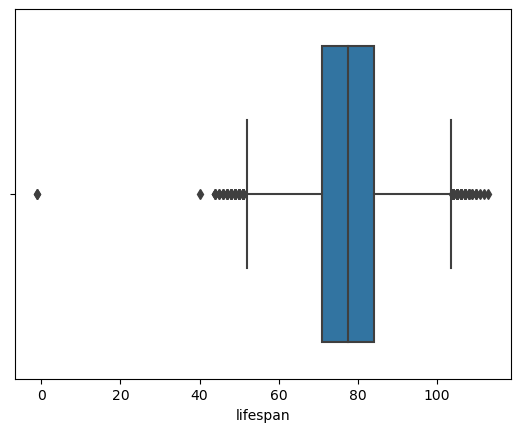

In [60]:
# got any outliers?
sns.boxplot(x=df['lifespan'])

#... alles buiten de lijnen is een outlier. 


In [61]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print (Q1)
print ()
print (Q3)
print ()
print (IQR)

# gooi het allemaal maar weg als het zo is. 
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 +1.5*IQR))).any(axis=1)]

genetic      79.0
length      174.0
mass         70.0
exercise      1.0
smoking       3.0
alcohol       2.0
sugar         2.0
lifespan     71.0
Name: 0.25, dtype: float64

genetic      82.0
length      193.0
mass         93.0
exercise      2.4
smoking      16.0
alcohol       7.0
sugar         4.7
lifespan     84.0
Name: 0.75, dtype: float64

genetic      3.0
length      19.0
mass        23.0
exercise     1.4
smoking     13.0
alcohol      5.0
sugar        2.7
lifespan    13.0
dtype: float64


<AxesSubplot: >

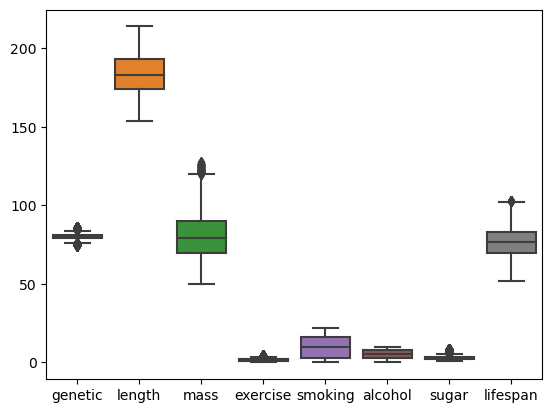

In [62]:
# got any outliers?

sns.boxplot(data=df)
#... alles buiten de lijnen is een outlier. 


In [63]:
# outliers check per categorie


# sns.boxplot(x=df['genetic'])
# sns.boxplot(x=df['length'])
# sns.boxplot(x=df['mass'])
# sns.boxplot(x=df['exercise'])
# sns.boxplot(x=df['smoking'])
# sns.boxplot(x=df['alcohol'])
# sns.boxplot(x=df['sugar'])
# sns.boxplot(x=df['lifespan'])


In [64]:
# uit EDA van docent geen idee wat ik hier nu aan heb. 

# df.lifespan.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
# plt.title("smokeing age")
# plt.ylabel('smoking')
# plt.xlabel('lifespan');

In [65]:
# ... maak een column bmi en een column bmi_category om te kijken of dat impact heeft.  

df['bmi'] = df['mass']/(df['length']/100)**2
df.head()

,genetic,length,mass,exercise,smoking,alcohol,sugar,lifespan,bmi
0,84.0,180.0,90.0,2.0,9.0,1.0,2.0,86.0,27.777778
1,84.0,204.0,79.0,3.0,2.0,7.0,3.0,100.0,18.983083
2,84.0,174.0,74.0,3.0,20.0,3.0,2.0,87.0,24.441802
3,84.0,187.0,78.0,2.0,6.0,5.0,3.0,91.0,22.305471
4,84.0,187.0,89.0,2.0,12.0,0.0,2.0,83.0,25.451114


In [66]:

# ... de bmi_category met een loop

# def bmi_category(bmi):
#     if bmi > 40:
#         return 'obese_3'
#     elif bmi > 35:
#         return 'obese_2'
#     elif bmi > 30:
#         return 'obese_1'
#     elif bmi > 25:
#         return 'over_weight'
#     elif bmi >= 18.5:
#         return 'normal_weight'
#     else:
#         return 'under_weight'

# df_bmi = df
# df_bmi['bmi_category'] = df['bmi'].apply(lambda x: bmi_category(x))


In [67]:
# ... een bmi_categorie met de 8 officiele categoerieën 

df_bmi = df.copy()
bmi_groups = [0, 16,17, 18.5, 25, 30,35,40,np.inf]
df_bmi['bmi_category']= pd.cut(df['bmi'], bins=bmi_groups, labels=['severe_thinness','moderate_thinness','mild_thinness','normal_weight','over_weight','obese_1','obese_2','obese_3'] )

display(df_bmi.head())


,genetic,length,mass,exercise,smoking,alcohol,sugar,lifespan,bmi,bmi_category
0,84.0,180.0,90.0,2.0,9.0,1.0,2.0,86.0,27.777778,over_weight
1,84.0,204.0,79.0,3.0,2.0,7.0,3.0,100.0,18.983083,normal_weight
2,84.0,174.0,74.0,3.0,20.0,3.0,2.0,87.0,24.441802,normal_weight
3,84.0,187.0,78.0,2.0,6.0,5.0,3.0,91.0,22.305471,normal_weight
4,84.0,187.0,89.0,2.0,12.0,0.0,2.0,83.0,25.451114,over_weight


In [68]:
# ... maak een column van de 3 officiele kleinere bmi groepen .  

bmi_narrow_groups = [0, 18.5, 25,np.inf]
df_bmi['bmi_narrow']= pd.cut(df['bmi'], bins=bmi_narrow_groups, labels=['under_weight','normal_weight','over_weight'] )
df_bmi.head()


,genetic,length,mass,exercise,smoking,alcohol,sugar,lifespan,bmi,bmi_category,bmi_narrow
0,84.0,180.0,90.0,2.0,9.0,1.0,2.0,86.0,27.777778,over_weight,over_weight
1,84.0,204.0,79.0,3.0,2.0,7.0,3.0,100.0,18.983083,normal_weight,normal_weight
2,84.0,174.0,74.0,3.0,20.0,3.0,2.0,87.0,24.441802,normal_weight,normal_weight
3,84.0,187.0,78.0,2.0,6.0,5.0,3.0,91.0,22.305471,normal_weight,normal_weight
4,84.0,187.0,89.0,2.0,12.0,0.0,2.0,83.0,25.451114,over_weight,over_weight


<AxesSubplot: xlabel='bmi_category', ylabel='lifespan'>

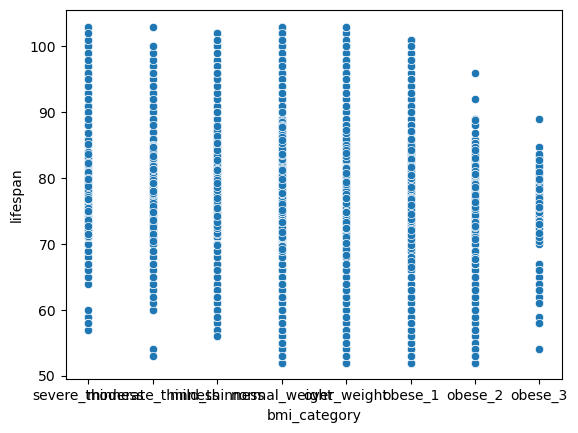

In [69]:
sns.scatterplot(df_bmi,x='bmi_category',y='lifespan')


<AxesSubplot: xlabel='bmi_narrow', ylabel='lifespan'>

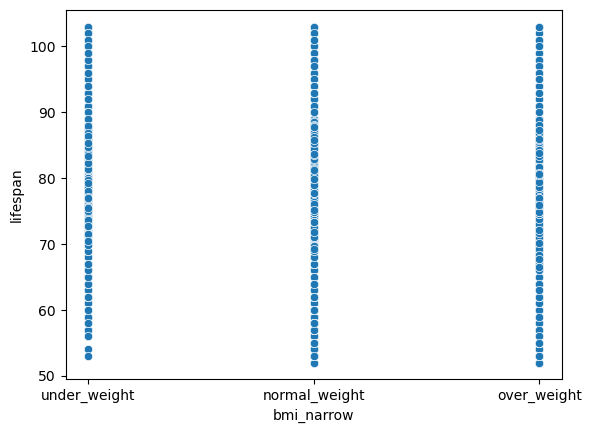

In [70]:
sns.scatterplot(df_bmi,x='bmi_narrow',y='lifespan')

<AxesSubplot: xlabel='bmi', ylabel='lifespan'>

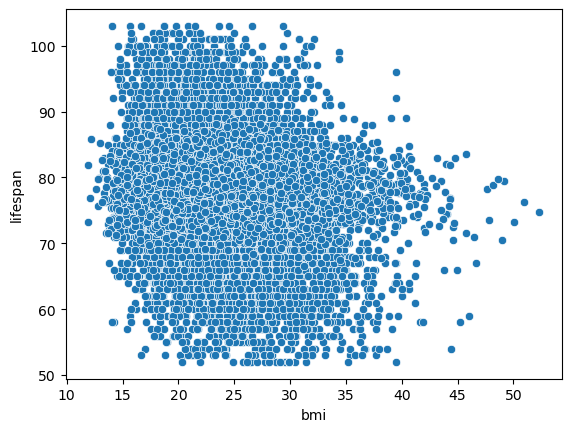

In [71]:
sns.scatterplot(df_bmi,x='bmi',y='lifespan')

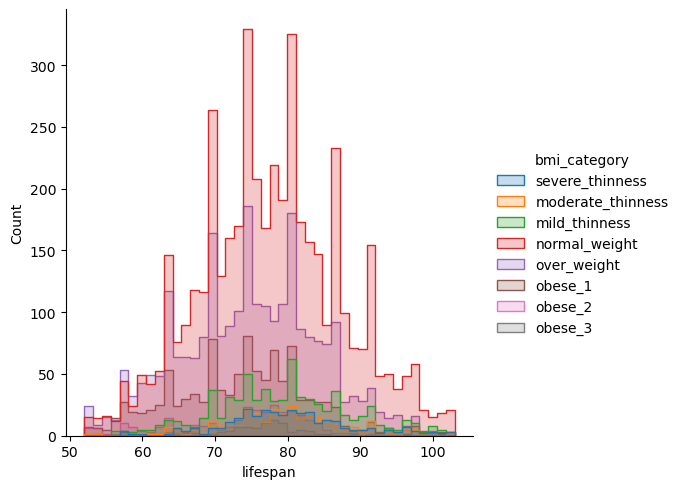

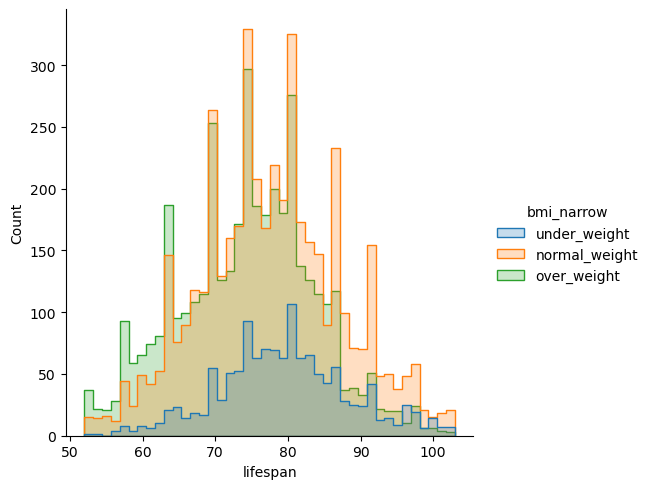

In [72]:
sns.displot(df_bmi, x="lifespan", hue="bmi_category", element="step"),
sns.displot(df_bmi, x="lifespan", hue="bmi_narrow", element="step")

<AxesSubplot: >

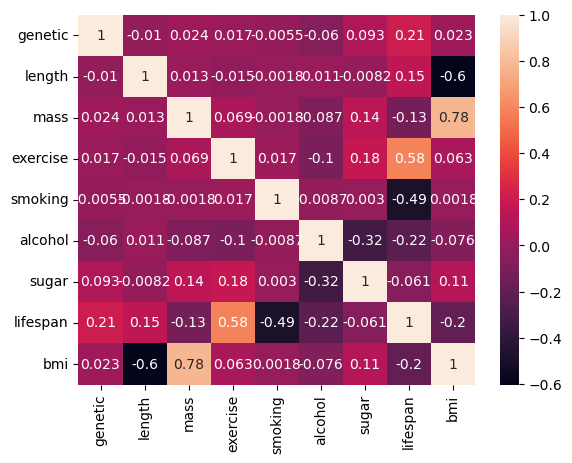

In [ ]:
# ... create a heatmap to see what the correlations between the columns are. 



sns.heatmap(df.corr(), annot=True)


<AxesSubplot: >

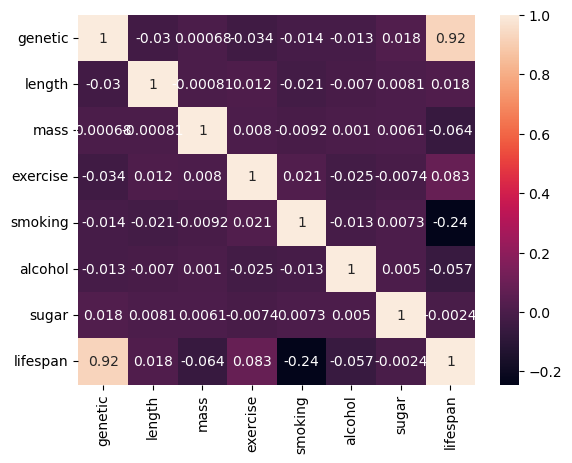

In [89]:
# ... create a heatmap to see what the correlations between the columns are. 

df_csv['genetic'] = pd.to_numeric(df_csv['genetic'], errors='coerce')
df_csv['length'] = pd.to_numeric(df_csv['length'], errors='coerce')
df_csv['mass'] = pd.to_numeric(df_csv['mass'], errors='coerce')
df_csv['exercise'] = pd.to_numeric(df_csv['exercise'], errors='coerce')
df_csv['alcohol'] = pd.to_numeric(df_csv['alcohol'], errors='coerce')
df_csv['sugar'] = pd.to_numeric(df_csv['sugar'], errors='coerce')


df_csv.astype('float64').dtypes

sns.heatmap(df_csv.corr(), annot=True)


In [74]:
import pandas as pd

# Assuming your DataFrame is named df_bmi_range

# Compute mean lifespan for each BMI category
mean_lifespan = df_bmi.groupby('bmi_category')['lifespan'].mean()

# Compute median lifespan for each BMI category
median_lifespan = df_bmi.groupby('bmi_category')['lifespan'].median()

# Print out the results
print('Mean lifespan by BMI category:\n', mean_lifespan)
print('\nMedian lifespan by BMI category:\n', median_lifespan)


Mean lifespan by BMI category:
 bmi_category
severe_thinness      80.153311
moderate_thinness    79.379167
mild_thinness        79.172136
normal_weight        77.571034
over_weight          74.718860
obese_1              73.552493
obese_2              73.381667
obese_3              74.841758
Name: lifespan, dtype: float64

Median lifespan by BMI category:
 bmi_category
severe_thinness      79.75
moderate_thinness    79.00
mild_thinness        79.00
normal_weight        77.55
over_weight          75.00
obese_1              74.00
obese_2              75.60
obese_3              76.90
Name: lifespan, dtype: float64


In [75]:
print(df_bmi.groupby('bmi_category')['lifespan'].describe())




                    count       mean       std   min     25%    50%     75%  \
bmi_category                                                                  
severe_thinness     302.0  80.153311  8.694332  57.0  75.000  79.75  85.000   
moderate_thinness   288.0  79.379167  8.589154  53.0  74.100  79.00  84.000   
mild_thinness       707.0  79.172136  9.370419  56.0  73.000  79.00  85.000   
normal_weight      4488.0  77.571034  9.737450  52.0  71.000  77.55  84.000   
over_weight        2508.0  74.718860  9.577190  52.0  68.000  75.00  81.000   
obese_1            1063.0  73.552493  9.191860  52.0  67.000  74.00  79.900   
obese_2             300.0  73.381667  8.807581  52.0  67.525  75.60  79.475   
obese_3              91.0  74.841758  6.823229  54.0  72.600  76.90  79.050   

                     max  
bmi_category              
severe_thinness    103.0  
moderate_thinness  103.0  
mild_thinness      102.0  
normal_weight      103.0  
over_weight        103.0  
obese_1            1

In [76]:
print(df_bmi.groupby('bmi_narrow')['lifespan'].describe())



                count       mean       std   min   25%    50%   75%    max
bmi_narrow                                                                
under_weight   1297.0  79.446569  9.048975  53.0  74.0  79.00  85.0  103.0
normal_weight  4488.0  77.571034  9.737450  52.0  71.0  77.55  84.0  103.0
over_weight    3962.0  74.307496  9.378237  52.0  68.0  75.00  80.8  103.0


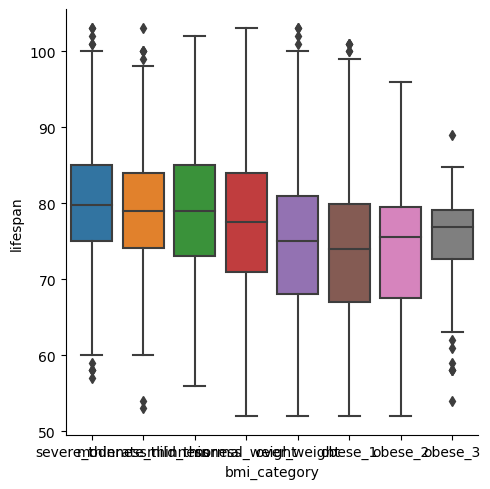

In [77]:

sns.catplot(data=df_bmi, x="bmi_category", y="lifespan", kind="box")
plt.show()

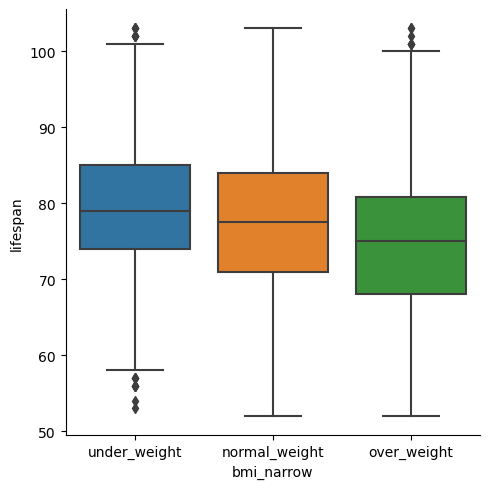

In [78]:

sns.catplot(data=df_bmi, x="bmi_narrow", y="lifespan", kind="box")
plt.show()

<AxesSubplot: xlabel='bmi_category', ylabel='lifespan'>

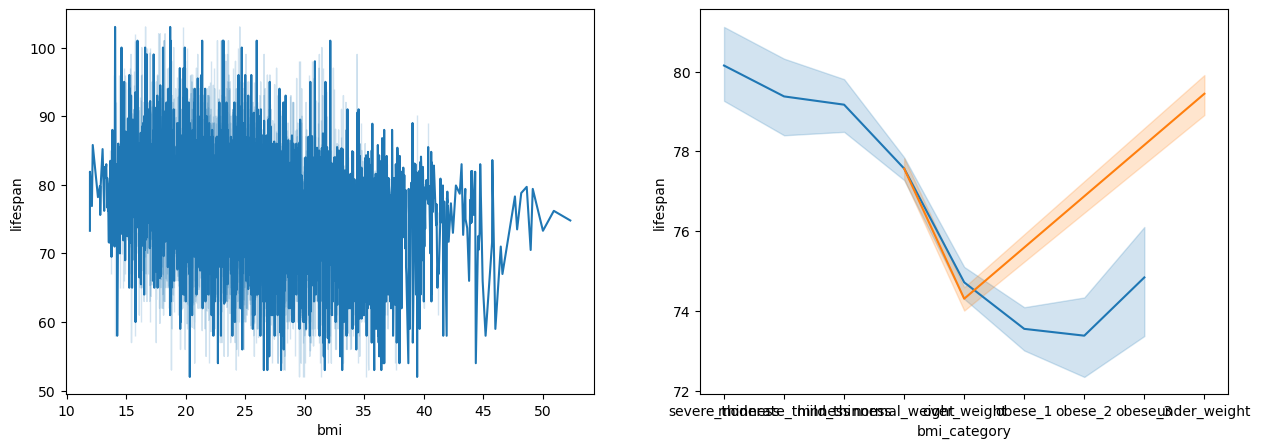

In [92]:


fig, axes = plt.subplots(1,2, figsize=(15,5))
sns.lineplot(df,x='bmi', y='lifespan', ax=axes[0])
sns.lineplot(df_bmi,x='bmi_category', y='lifespan', ax=axes[1])
sns.lineplot(df_bmi,x='bmi_narrow', y='lifespan', ax=axes[1])

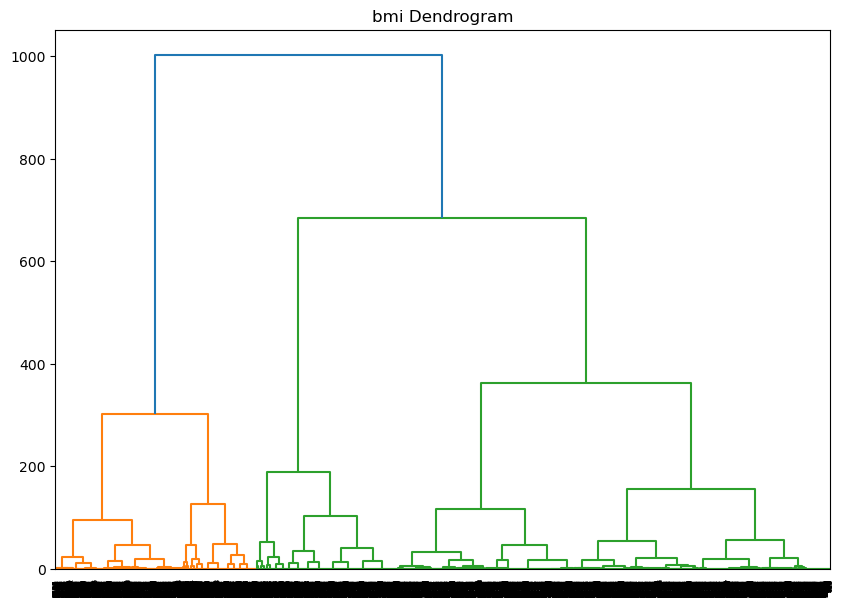

In [80]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.title("bmi Dendrogram")

# Selecting lifespan and bmi by index
selected_data = df.iloc[:, 7:8]
clusters = shc.linkage(selected_data, 
            method='ward', 
            metric="euclidean")
shc.dendrogram(Z=clusters)
plt.show()

In [81]:
# ... hier morgen naar kijken ivbm visualisatie ed. 

import webbrowser as wb
wb.open('https://scikit-learn.org/stable/index.html')

True

In [82]:
from sklearn.cluster import AgglomerativeClustering

clustering_model = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
clustering_model.fit(df)
clustering_model.labels_

array([0, 0, 2, ..., 0, 1, 1])

In [95]:
# ... safe the df as a .csv were the delimiter is a semi colon. 

import datetime as dt

# df.to_csv('../edited_files/20230307data.csv', index=False,sep=';')
df.to_csv('../data/output_data/EDA_{}.csv'.format(dt.datetime.now().strftime("%Y-%m-%d %H%M")), index=False,sep=';')